# AGGREGATION AND CLEANING OF UNSTRUCTURED HOUSE RENTS DATA OF POPULAR NIGERIAN CITIES

We have 6 similar house rents datasets of Nigerian cities which needs to be cleaned and aggregated for analysis. You can download them on kaggle via this [link](https://www.kaggle.com/duoarc/rent-listings-in-nigeria/version/1#prop24.csv)


    Our main goals are:
    1. clean all numeric and non-numeric columns in our datasets
    2. efficiently aggregate the six(6) datasets into one that we can use for analysis.
   
  ### Summary:
      The six dataset were cleaned with some rows droped to ensure consistency and accuracy. 
      The final dataset has about 5 columns and more than 8,000 rows of data

    importing required libraries and reading data from cvs files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

In [2]:
# reading the csv files into pandas dataframe
housing_1 = pd.read_csv("findnigprop.csv")
housing_2 = pd.read_csv("naijaprop.csv")
housing_3 = pd.read_csv("prop24.csv")
housing_4 = pd.read_csv("propexp.csv")
housing_5 = pd.read_csv("renting.csv")
housing_6 = pd.read_csv("trovit.csv")


## Inspecting the Datasets

In [3]:
housing_1.head()

,price,unit,location,bedrooms,baths,state
0,"₦2,620,000.00 Per Year","₦2,620,000.00 Per Year",", 7 obasa street, Oba-Akran, Ikeja, Lagos, Nig...",NaN,NaN,NaN
1,"₦2,500,000.00","₦2,500,000.00",", Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
2,"₦300,000.00","₦300,000.00",", ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
3,per month,per month,", World Trade Center Commercial Tower, Plot 11...",NaN,NaN,NaN
4,,,", World Trade Center, Plot 1113, Constitution ...",2.0,NaN,NaN


In [4]:
housing_2.head()

,price,unit,location,bedrooms,baths,state
0,"1,000,000",per Year,"15 - 17 Bolaji Balogun Street, Ayonusi Estate,...",5.0,6.0,Lagos
1,"600,000",per Year,"15 - 17 Bolaji Balogun Street, Ayonusi Estate,...",3.0,3.0,Lagos
2,"250,000",per Year,"badore,owode and addo roads,",1.0,1.0,Lagos
3,"1,000,000",per Year,"ilupeju,",3.0,2.0,Lagos
4,"600,000",per Year,"badore road,",NaN,NaN,Lagos


In [5]:
housing_3.head()

,price,unit,location,bedrooms,baths,parking_lots,state
0,\r\r\n ₦ 8 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"1c Fatai Durosinmi-Etiti Cres, Lagos Island We...",5.0,4,1,Lagos
1,\r\r\n ₦ 3 200 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"IKOTA, Lekki, Lekki",4.0,4,NaN,Lagos
2,\r\r\n ₦ 2 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"IKATE, Lekki, Lekki",2.0,2,NaN,Lagos
3,\r\r\n ₦ 2 500 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"ONIRU, Victoria Island, Lekki",3.0,3,NaN,Lagos
4,\r\r\n ₦ 18 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"BANANA ISLAND ESTATE, Ikoyi-obalende, Ikoyi-ob...",3.0,3,NaN,Lagos


In [6]:
housing_4.head()

,price,unit,location,bedrooms,baths,parking_lots,state
0,"₦4,500,000",per year,"Ikoyi, Lagos",2,2,NaN,"Ikoyi, Lagos"
1,"₦15,000,000",per year,"Ikoyi, Lagos",4,4,NaN,"Ikoyi, Lagos"
2,"₦15,000,000",per year,"Ikoyi, Lagos",3,4,NaN,"Ikoyi, Lagos"
3,"₦6,000,000",per year,"Ikoyi, Lagos",2,2,NaN,"Ikoyi, Lagos"
4,"₦13,000,000",per year,"Ikoyi, Lagos",3,4,NaN,"Ikoyi, Lagos"


In [7]:
housing_5.head()

,price,unit,location,bedrooms,baths,state
0,"₦ 5,000 / Per Event","₦ 5,000 / Per Event",LAGOS/Ikeja,NaN,NaN,NaN
1,"₦ 45,000 / Yearly","₦ 45,000 / Yearly",ABUJA (FCT)/Dutse Makaranta,1.0,NaN,NaN
2,"₦ 45,000 / Yearly","₦ 45,000 / Yearly",ABUJA (FCT)/Dutse Makaranta,1.0,NaN,NaN
3,"₦ 50,000 / Yearly","₦ 50,000 / Yearly",ABUJA (FCT)/Dutse Sokale,1.0,NaN,NaN
4,"₦ 65,000 / Yearly","₦ 65,000 / Yearly",ABUJA (FCT)/Dutse Alhaji,1.0,NaN,NaN


In [8]:
housing_6.head()

,price,unit,location,bedrooms,baths,state
0,"₦450,000",per Year,"Ogun, Odeda, Ogun State",2,2,NaN
1,"₦150,000",per Year,"Abeokuta, Abeokuta South, Ogun State",1,1,NaN
2,"₦700,000",per Year,"Ogun, Odeda, Ogun State",3,3,NaN
3,"₦250,000",per Year,"Ifo, Ogun State",2,2,NaN
4,"₦200,000",per Year,"Ofada, Obafemi Owode, Ogun State",NaN,NaN,NaN


### OBSERVATION

    All the datasets have five(5) columns in common - Price, unit, location, bedrooms, baths and state.The parking_lot column is  present in only 2 of our dataset. Also, all the common columns requires cleaning and conversion to their appropriate data types. For example,it is obvious that location should be strings but in some rows we have a combination of words and numbers.

    We will now clean each of the datasets starting from housing_1.
    

 ### INSPECTING AND CLEANING 1ST DATASET

In [9]:
housing_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 6 columns):
price       752 non-null object
unit        752 non-null object
location    752 non-null object
bedrooms    620 non-null float64
baths       437 non-null object
state       0 non-null float64
dtypes: float64(2), object(4)
memory usage: 35.3+ KB


    The bedrooms and  baths columns have lots of missing values and state column contain no value at all. 
    We also need to convert each column to their respective data types after cleaning.
    First, we do a heatmap Visualization to observe the null values more clearly.

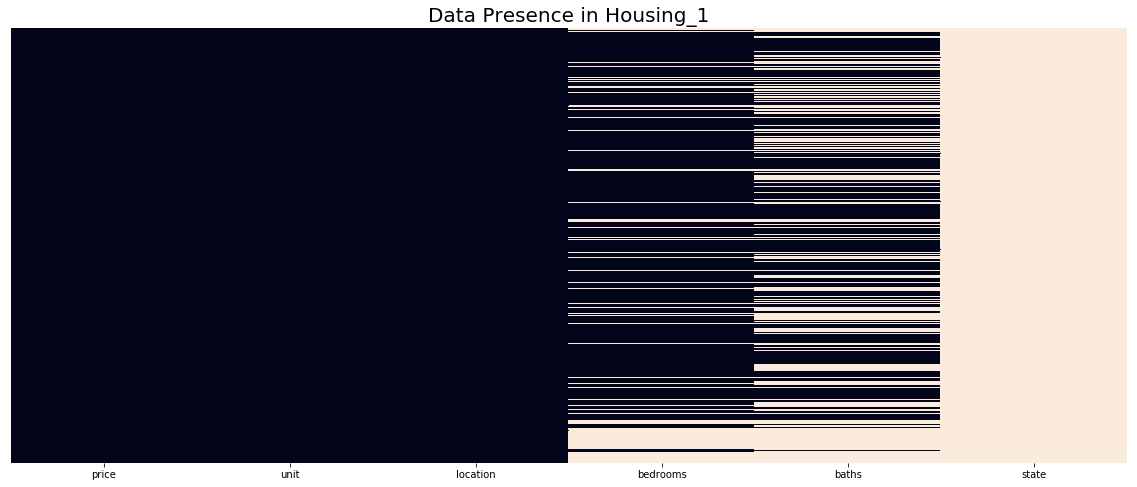

In [10]:
fig,ax = plt.subplots(figsize =(20,8))
ax = sns.heatmap(housing_1.isnull(), cbar=False)
ax.set_yticks([])
ax.set_title("Data Presence in Housing_1", fontsize=20)
plt.show()

#### We start cleaning from left to right along the rows. So we take the price column first.

In [11]:
housing_1["price"].value_counts().head()

                    36
₦35,000,000.00      19
₦150,000,000.00     13
₦65,000,000.00      13
₦40,000,000.00      12
Name: price, dtype: int64

In [12]:
housing_1["price"].unique()[:50]

array(['₦2,620,000.00 Per Year', '₦2,500,000.00 ', '₦300,000.00 ',
       ' per month', ' ', '₦33,000,000.00 ', '₦30,000,000.00 ',
       '₦3,750,000.00 Per Year', '₦40,000,000.00 ', '₦150,000,000.00 ',
       '₦5,500,000.00 Per Year', '₦48,000,000.00 ', '₦9,500,000.00 ',
       '₦66,000,000.00 ', '₦2,700,000.00 ', '₦10,000,000.00 ',
       '₦350,000.00 Per Year', '₦40,000.00 Per Year', '₦55,000,000.00 ',
       '₦110,000,000.00 ', '₦16,600,000.00 ', '₦85,000,000.00 ',
       '₦50,000,000.00 ', '₦8,500,000.00 ', '₦39,000,000.00 ',
       '₦35,000,000.00 ', '₦300,000,000.00 ', '₦75,000,000.00 ',
       '₦850,000.00 ', '₦18,000,000.00 ', '₦12,000,000.00 ',
       '₦3,000,000.00 Per Year', '₦400,000.00 Per Year', '₦1,275,000.00 ',
       '₦28,000,000.00 ', '₦26,000,000.00 ', '₦33,500,000.00 ',
       '₦16,000,000.00 ', '₦1,700,000.00 Per Year', '₦500,000,000.00 ',
       '₦550,000,000.00 ', '₦520,000,000.00 ', '₦6,000,000.00 ',
       '₦1,000,000.00 Per Year', '₦15,000,000.00 ', '₦4,000,0

    On close observation, We notice the following:
    * A considerable number of rows have empty spaces where price values ought to be
    * some prices have a combination of numbers, symbols and strings (unit) e.g ₦6,656,000.00 Per Year
    * a few of the values are in dollars.
    * some rows have wholely strings (e.g Per Month) entered as price 

    We will use the following strategy to clean the dataset:
    1. remove unwanted words and charaters in price.
    2. convert all prices to numberic.
    3. convert prices in dollars to naira by multiplying them with the current exchange rate.
    4. convert all the prices rendered as payment in months or days to price in years.

In [13]:
# removing special characters and string attached to prices ($, ₦, Per Month, Per Year, Per day )
housing_1['price'] = housing_1['price'].str.replace("₦","").str.replace("$","").str.replace("per day|per month|per year","",case =False).str.replace(",","").str.strip()

In [14]:
# we convert price values to numeric
housing_1["price"] = pd.to_numeric(housing_1["price"], errors = 'coerce')

Our code above forces non-numeric values to NaN. We now drop rows with NaN

In [15]:
housing_1 = housing_1.drop(housing_1.loc[housing_1["price"].isnull()].index, axis =0)
housing_1.reset_index(drop=True, inplace=True)

In [16]:
housing_1["price"].head()

0     2620000.0
1     2500000.0
2      300000.0
3    33000000.0
4    30000000.0
Name: price, dtype: float64

In [17]:
housing_1["price"].isnull().sum()

0

In [18]:
housing_1.head()

,price,unit,location,bedrooms,baths,state
0,2620000.0,"₦2,620,000.00 Per Year",", 7 obasa street, Oba-Akran, Ikeja, Lagos, Nig...",NaN,NaN,NaN
1,2500000.0,"₦2,500,000.00",", Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
2,300000.0,"₦300,000.00",", ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria",NaN,NaN,NaN
3,33000000.0,"₦33,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",5.0,5f,NaN
4,30000000.0,"₦30,000,000.00",", Alafia Bus stop, Badagry Express Way, Lagos,...",8.0,7f,NaN


### Converting Prices in Dollars to Naira and converting all prices to yearly price

    We've just striped off the special characters attached to the price values and converted them to numeric.It is now almost impossible to know which prices were in dollars. However, as seen above, the unit columns also holds the price values. We can use these values to find out where our prices were in dollars and then multiply the corresponding values in the price columns with the dollar-naira exchange rate which in this project is 360.
    
    Some of the prices as shown on the unit column are either in years, months or days. We have to calculate these prices per year. 
    
    To handle these conversions, we create a function that we can re-use in cleaning other datasets.

In [19]:
def price_conversion(data):
    """
    The function takes in a dataset, iterate through each row and uses the unit column to convert prices in dollars to naira.
    Also, prices in months, weeks and days are converted to yearly prices.
    
    Args(pandas DF): the pandas dataframe to be cleaned.
    
    Returns(float): yearly price in naira
    
    """
    for index, row_series in data.iterrows():
        if "$" in row_series['unit']:
            data.at[index, 'price'] = row_series['price'] * 360
# since Iterrows() works on only a copy of the dataset, we use data.at[index,'column']
# to write in the change(s) we've made in the column into  the dataset.
        else:
            if "month" or "monthly" in row_series['unit'].lower().split():
                data.at[index, 'price'] = row_series['price'] * 12
            elif "week" or "weekly"  in row_series['unit'].lower().split():
                data.at[index, 'price'] = row_series['price'] * 52
            elif "day" or "daly" in row_series['unit'].lower().split():
                data.at[index, 'price'] = row_series['price'] * 365
            else:
                pass
    return data

In [20]:
housing_1 = price_conversion(housing_1)

In [21]:
# checking if our fuction worked as intended.
housing_1.tail()

,price,unit,location,bedrooms,baths,state
704,1.140000e+10,"₦950,000,000.00",", Adeola Odeku, Victoria Island (VI), Lagos, N...",NaN,NaN,NaN
705,4.800000e+07,"₦4,000,000.00 per month",", Allen Avenue, Ikeja, Lagos, Nigeria",NaN,NaN,NaN
706,2.400000e+09,"₦200,000,000.00",", ALABA INTERNATIONAL MARKET;IGBEDE ROAD..., O...",NaN,NaN,NaN
707,3.300000e+05,"₦27,500.00 Per Year",", Awolowo Road, Nigeria",NaN,NaN,NaN
708,6.000000e+06,"₦500,000.00 Per Year",", Ogudu GRA Road, Nigeria",NaN,NaN,NaN


### Extration of states from the Location column

    We create a function to extract states from location and the output saved in the state column.

In [22]:
# check the unique locations
housing_1['location'].unique()[:20]

array([', 7 obasa street, Oba-Akran, Ikeja, Lagos, Nigeria',
       ', Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria',
       ', ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria',
       ', Alafia Bus stop, Badagry Express Way, Lagos, Nigeria',
       ', jabi by eco bank, Jabi, Abuja FCT, Nigeria',
       ', Oduduwa Crescent, Nigeria', ', Nigeria',
       ', BeechWood Estate Shapati, Lakowe Lagos., Lakowe, Ibeju/Lekki, Lagos, Nigeria',
       ', Image, Ikate, Lekki, Lagos, Nigeria',
       ', Kayetoro street, eleko Lagos, Eleko, Ibeju/Lekki, Lagos, Nigeria',
       ', Boystown Bus stop, Ipaja Road, Ipaja Lagos, Egbeda, Alimosho, Lagos, Nigeria',
       ', solebo estate ebute ikorodu, Ipakodo, Ikorodu, Lagos, Nigeria',
       ', adegbose estate solebo ebute, Ipakodo, Ikorodu, Lagos, Nigeria',
       ', Lifecamp, Gwarinpa, Abuja FCT, Nigeria',
       ', Apo, Gudu, Abuja FCT, Nigeria',
       ', Gwarinpa, Gwarinpa, Abuja FCT, Nigeria',
       ', Simawa, Ogun, Nigeria', ', Lekki Gardens Horizo

In [23]:
def find_state(string):
    '''
    function takes in a city and return the state where the city belong.
    
    Args(str): the name of the city.
    
    Returns(str): name of state.
    
    '''
    list =[
        "lagos", "abuja", "rivers", "cross river", "ogun", "oyo", 
        "delta", "edo", "abia", "adamawa", "akwa ibom","sokoto",
        "anambra", "bauchi", "bayelsa", "benue","borno","ebonyi",
        "ekiti","enugu", "gombe", "imo", "jigawa", "kano","kastina",
        "kebbi", "kogi", "kwara","niger", "ondo", "osun", "plateau",
        "taraba","yobe", "zamfara","kaduna","nasarawa"
    ]
    
    for a in list:
        if a in string.lower():
            return a
        

In [24]:
# we apply the function and store the values in a new column name state
housing_1["state"] = housing_1["location"].apply(find_state)

In [25]:
housing_1["state"].value_counts(dropna=False)

lagos          551
abuja           65
niger           59
ogun            15
oyo             11
rivers           4
abia             2
cross river      1
delta            1
Name: state, dtype: int64

### Cleaning location and unit columns

In [26]:
housing_1["location"].head()

0    , 7 obasa street, Oba-Akran, Ikeja, Lagos, Nig...
1        , Tudu wada, Karshi,, Karu, Nasaruwa, Nigeria
2     , ukeh, masaka, mararba, Karu, Nasaruwa, Nigeria
3    , Alafia Bus stop, Badagry Express Way, Lagos,...
4    , Alafia Bus stop, Badagry Express Way, Lagos,...
Name: location, dtype: object

    For the location column, we require just the city. We do a split and extract the city where possible.

In [27]:
housing_1["location"] = housing_1["location"].str.split(",").str[2]

In [28]:
housing_1["location"].value_counts(dropna=False).head(10)

 Lekki              64
 Nigeria            42
 Ikoyi              42
 Lagos              35
 Victoria Island    31
 Ikeja              30
 Abuja FCT          25
 Ajah               16
NaN                 14
                    12
Name: location, dtype: int64

    We have about 14 missing values in location. Since this data is difficult to get from our dataset or research on, we take the corresponding states as the location.

In [29]:
housing_1.loc[housing_1["location"].isnull(), 'location'] = housing_1.loc[housing_1["location"].isnull(),"state"]

### BATHROOMS AND BATHS COLUMNS

    We take a look at the bedrooms and bath columns of our dataset to ascertain whether we should go ahead with cleaning them now or leave them for later.

In [30]:
housing_1.bedrooms.value_counts(dropna=False)

 0.0     191
 3.0     126
 4.0     124
NaN      114
 5.0      78
 2.0      37
 6.0      13
 1.0       9
 7.0       3
 8.0       3
 12.0      2
 9.0       2
 10.0      2
 15.0      1
 30.0      1
 16.0      1
 11.0      1
 14.0      1
Name: bedrooms, dtype: int64

In [31]:
housing_1.baths.value_counts(dropna=False)

NaN     287
0f      283
3f       42
4f       39
5f       23
2f       15
6f        9
1f        4
7f        3
10f       2
9f        1
3.5f      1
Name: baths, dtype: int64

### Observation:
    The 2 columns holds data that seems to make little analytical sense. For example, we have lots of houses with zero (0) bedrooms/baths and up to 16 bedrooms. Also, we have many missing values in both columns and there are no columns from our dataset or external resource to get them from.  
    For now we decide to leave these columns the way they are until after we aggregate all the datasets together.

In [32]:
# we remove the units column from our dataset
housing_1.drop('unit', axis =1, inplace=True)

     The cleaned version of the dataset is inspected to ensure that we are on the right track.

In [33]:
housing_1.head()

,price,location,bedrooms,baths,state
0,31440000.0,Oba-Akran,NaN,NaN,lagos
1,30000000.0,Karshi,NaN,NaN,niger
2,3600000.0,masaka,NaN,NaN,niger
3,396000000.0,Badagry Express Way,5.0,5f,lagos
4,360000000.0,Badagry Express Way,8.0,7f,lagos


In [34]:
housing_1.isnull().sum()

price         0
location      0
bedrooms    114
baths       287
state         0
dtype: int64

# Cleaning the 2nd Dataset

    First, we check all the columns of the dataset

In [35]:
housing_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
price       20 non-null object
unit        20 non-null object
location    20 non-null object
bedrooms    18 non-null float64
baths       17 non-null float64
state       20 non-null object
dtypes: float64(2), object(4)
memory usage: 1.0+ KB


In [36]:
housing_2.head()

,price,unit,location,bedrooms,baths,state
0,"1,000,000",per Year,"15 - 17 Bolaji Balogun Street, Ayonusi Estate,...",5.0,6.0,Lagos
1,"600,000",per Year,"15 - 17 Bolaji Balogun Street, Ayonusi Estate,...",3.0,3.0,Lagos
2,"250,000",per Year,"badore,owode and addo roads,",1.0,1.0,Lagos
3,"1,000,000",per Year,"ilupeju,",3.0,2.0,Lagos
4,"600,000",per Year,"badore road,",NaN,NaN,Lagos


In [37]:
# check for null values and columns to clean in the dataset. 
housing_2.isnull().sum()

price       0
unit        0
location    0
bedrooms    2
baths       3
state       0
dtype: int64

### Observation:

    We have a very small dataset here (just 20 rows). There are very few missing values and they are present only in the bathrooms and baths columns. However, we have to convert price,bathrooms and baths to numeric types and also check if there's any need to  clean the location and states columns.

### Cleaning price column

In [38]:
housing_2["price"].unique()

array(['1,000,000', '600,000', '250,000', '400,000', '3,700,000', '100',
       '12,500,000', '1,500,000', '15', '15,000,000', '1,700,000',
       '85,000', '2,500,000', '360,000', '10', '2,200,000', '3,300,000'], dtype=object)

    From the unique price values, all we need removed before converting to numberic is the coma(,) sign

In [39]:
housing_2["price"] = housing_2["price"].str.replace(",", "").astype(float)

### Cleaning Location

In [40]:
housing_2["location"].head(10)

0    15 - 17 Bolaji Balogun Street, Ayonusi Estate,...
1    15 - 17 Bolaji Balogun Street, Ayonusi Estate,...
2                         badore,owode and addo roads,
3                                             ilupeju,
4                                         badore road,
5                                         badore road,
6                             Choba Uniport Road, Ph.,
7                                 Ozuoba NTA road Ph.,
8                                               Ikoyi,
9                                             alapere,
Name: location, dtype: object

    We notice that the last two words in location for each row is more descriptive. So we will split the location strings and take the last two words.

In [41]:
housing_2["location"] = housing_3["location"].str.split(",").str[-2]

In [42]:
housing_2["location"].unique()

array([' Lagos Island West', ' Lekki', ' Victoria Island',
       ' Ikoyi-obalende', ' Egbe Idimu', ' Lagos Mainland'], dtype=object)

       We will leave out the cleaning of the bedrooms and baths columns until after we concatenate all the datasets

In [43]:
# we'll drop the units column since we all the values are 'per year' and we don't need it in our combined dataset.
housing_2.drop('unit', axis =1, inplace=True)

In [44]:
housing_2.isnull().sum()

price       0
location    0
bedrooms    2
baths       3
state       0
dtype: int64

In [45]:
housing_2.head()

,price,location,bedrooms,baths,state
0,1000000.0,Lagos Island West,5.0,6.0,Lagos
1,600000.0,Lekki,3.0,3.0,Lagos
2,250000.0,Lekki,1.0,1.0,Lagos
3,1000000.0,Victoria Island,3.0,2.0,Lagos
4,600000.0,Ikoyi-obalende,NaN,NaN,Lagos


# Cleaning Dataset 3

    we first inspect the dataset

In [46]:
housing_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 7 columns):
price           612 non-null object
unit            610 non-null object
location        607 non-null object
bedrooms        570 non-null float64
baths           562 non-null object
parking_lots    291 non-null object
state           612 non-null object
dtypes: float64(1), object(6)
memory usage: 33.5+ KB


In [47]:
housing_3.head()

,price,unit,location,bedrooms,baths,parking_lots,state
0,\r\r\n ₦ 8 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"1c Fatai Durosinmi-Etiti Cres, Lagos Island We...",5.0,4,1,Lagos
1,\r\r\n ₦ 3 200 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"IKOTA, Lekki, Lekki",4.0,4,NaN,Lagos
2,\r\r\n ₦ 2 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"IKATE, Lekki, Lekki",2.0,2,NaN,Lagos
3,\r\r\n ₦ 2 500 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"ONIRU, Victoria Island, Lekki",3.0,3,NaN,Lagos
4,\r\r\n ₦ 18 000 000\r\r\n ...,\r\r\n Per Year\r\r\n ...,"BANANA ISLAND ESTATE, Ikoyi-obalende, Ikoyi-ob...",3.0,3,NaN,Lagos


In [48]:
housing_3.isnull().sum()

price             0
unit              2
location          5
bedrooms         42
baths            50
parking_lots    321
state             0
dtype: int64

### Observation:

    we have about 611 rows and 7 columns of data with missing values in 3 columns.The parking_lots column however have many missing values and it is not needed. 
    The price and unit columns requires deep cleaning to put them in order.

### we'll do some cleaning on this dataset by:

    1. droping the parking_lots column since we don't need it for our analysis
    2. cleaning price and convert to float numbers
    3. removing null values from city_location and unit

In [49]:
# dropping parking_lots
housing_3.drop("parking_lots", axis =1, inplace = True)

### Cleaning price column

In [50]:
housing_3["price"].head()

0    \r\r\n                    ₦ 8 000 000\r\r\n   ...
1    \r\r\n                    ₦ 3 200 000\r\r\n   ...
2    \r\r\n                    ₦ 2 000 000\r\r\n   ...
3    \r\r\n                    ₦ 2 500 000\r\r\n   ...
4    \r\r\n                    ₦ 18 000 000\r\r\n  ...
Name: price, dtype: object

    we observe the real prices are always after  the charaters \r\r\n . So we do a split and extract price

In [51]:
# extracting price and removing unwanted characters
housing_3["price"] = housing_3["price"].str.split("\r\r\n").str[1].str.replace("₦","").str.replace(r"[\s+]","").str.strip()

In [52]:
# we convert the prices to float values
housing_3["price"] =housing_3["price"].astype(float)

In [53]:
housing_3.head()

,price,unit,location,bedrooms,baths,state
0,8000000.0,\r\r\n Per Year\r\r\n ...,"1c Fatai Durosinmi-Etiti Cres, Lagos Island We...",5.0,4,Lagos
1,3200000.0,\r\r\n Per Year\r\r\n ...,"IKOTA, Lekki, Lekki",4.0,4,Lagos
2,2000000.0,\r\r\n Per Year\r\r\n ...,"IKATE, Lekki, Lekki",2.0,2,Lagos
3,2500000.0,\r\r\n Per Year\r\r\n ...,"ONIRU, Victoria Island, Lekki",3.0,3,Lagos
4,18000000.0,\r\r\n Per Year\r\r\n ...,"BANANA ISLAND ESTATE, Ikoyi-obalende, Ikoyi-ob...",3.0,3,Lagos


### Unit column

    The unit column obviously require cleaning.we'll extract the neccessary words form each entry and check the unique values in the column to check for adnormalities

In [54]:
# we extract units
housing_3["unit"] = housing_3["unit"].str.split("\r\r\n").str[1].str.strip()

In [55]:
housing_3["unit"].unique()

array(['Per Year', 'Per m²', 'Per Month', nan, 'Per Day'], dtype=object)

    We have 4 types of units of which 3 are familiar.So far, we've not seen any Per m² unit. Let's first ascertain the percentage of rows where it occurs

In [56]:
pm = (housing_3["unit"]=="Per m²").sum()/housing_3.shape[0] *100
print('The percentage of our data where units is labeled Per m² is: {}'.format(round(pm),0))

The percentage of our data where units is labeled Per m² is: 3.0


    Rows whose units are in Per squared meters needs to be dropped since the size of the property is not given. only about 3% of our data fall in this category so it is safe to drop them.

In [57]:
housing_3.drop(housing_3[housing_3["unit"]=="Per m²"].index, axis =0, inplace =True)

In [58]:
housing_3 =housing_3.reset_index(drop =True)

In [59]:
housing_3['unit'].value_counts(dropna=False)

Per Year     506
Per Month     63
Per Day       23
NaN            2
Name: unit, dtype: int64

    we have 2 missing values in the units column. we will obtain the dataset where unit is missing, check up the state(s) and find the mode of the units for those states. We will then fill in the missing values with this mode.

In [60]:
housing_3.loc[housing_3['unit'].isnull()]

,price,unit,location,bedrooms,baths,state
78,20000000.0,NaN,"Asokoro, Asokoro",6.0,8,Abuja
121,500000000.0,NaN,"Maitama, Maitama",6.0,8,Abuja


In [61]:
# since the state is Abuja, we find the most frequent unit for that state
housing_3.loc[housing_3['state']=="Abuja","unit"].mode()

0    Per Year
dtype: object

In [62]:
# we fill the missing values with the mode
housing_3.unit.fillna("Per Year", inplace =True)

    We recall that not all prices are yearly so the prices need to be converted using the unit column. We use the price_conversion formula here.

In [63]:
# converting all prices to yearly price.
housing_3 = price_conversion(housing_3)

In [64]:
# We drop the unit column now
housing_3.drop('unit', axis = 1, inplace= True)

### Location

In [65]:
housing_3['location'].head()

0    1c Fatai Durosinmi-Etiti Cres, Lagos Island We...
1                                  IKOTA, Lekki, Lekki
2                                  IKATE, Lekki, Lekki
3                        ONIRU, Victoria Island, Lekki
4    BANANA ISLAND ESTATE, Ikoyi-obalende, Ikoyi-ob...
Name: location, dtype: object

    We observe that the required city location are frequently the last phrase after the coma(,) in the location string. So we extract these.
    For missing values, we'll fill them in with their corresponding states. 

In [66]:
housing_3['location'] = housing_3['location'].str.split(",").str[-1]

In [67]:
# filling missing locations with corresponding states values
housing_3.loc[housing_3['location'].isnull(),"location"] = housing_3.loc[housing_3['location'].isnull(),"state"]

In [68]:
housing_3.isnull().sum()

price        0
location     0
bedrooms    28
baths       36
state        0
dtype: int64

In [69]:
housing_3.head()

,price,location,bedrooms,baths,state
0,96000000.0,Lagos Island West,5.0,4,Lagos
1,38400000.0,Lekki,4.0,4,Lagos
2,24000000.0,Lekki,2.0,2,Lagos
3,30000000.0,Lekki,3.0,3,Lagos
4,216000000.0,Ikoyi-obalende,3.0,3,Lagos


# Cleaning the 4th Dataset

    General dataset inspection

In [70]:
housing_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 7 columns):
price           378 non-null object
unit            378 non-null object
location        377 non-null object
bedrooms        378 non-null int64
baths           378 non-null int64
parking_lots    0 non-null float64
state           377 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 20.8+ KB


In [71]:
housing_4.head()

,price,unit,location,bedrooms,baths,parking_lots,state
0,"₦4,500,000",per year,"Ikoyi, Lagos",2,2,NaN,"Ikoyi, Lagos"
1,"₦15,000,000",per year,"Ikoyi, Lagos",4,4,NaN,"Ikoyi, Lagos"
2,"₦15,000,000",per year,"Ikoyi, Lagos",3,4,NaN,"Ikoyi, Lagos"
3,"₦6,000,000",per year,"Ikoyi, Lagos",2,2,NaN,"Ikoyi, Lagos"
4,"₦13,000,000",per year,"Ikoyi, Lagos",3,4,NaN,"Ikoyi, Lagos"


In [72]:
housing_4.isnull().sum()

price             0
unit              0
location          1
bedrooms          0
baths             0
parking_lots    378
state             1
dtype: int64

### Observation:

    We have about 377 rows and 7 columns. Except for parking_lots, the dataset contains only 2 missing values but the price, location and state columns require a little bit of cleaning to get them ready for analysis. We first have to remove the parking_lots column though.


In [73]:
housing_4.drop("parking_lots", axis=1, inplace =True)

### Price

    Removing unwanted characters from the price and converting to float.

In [74]:
housing_4["price"].head()

0     ₦4,500,000 
1    ₦15,000,000 
2    ₦15,000,000 
3     ₦6,000,000 
4    ₦13,000,000 
Name: price, dtype: object

In [75]:
housing_4["price"] = housing_4["price"].str.replace("₦","").str.replace(",","").str.strip().astype(float)

###  unit

In [76]:
housing_4["unit"].value_counts()

per year    368
per sqm       7
per day       3
Name: unit, dtype: int64

    We have per sqm  occuring 7 times whereas we do not have the size of the property. The best option we have is to drop all rows with this entry since they are few

In [77]:
# droping rows and reseting index
housing_4.drop(housing_4[housing_4["unit"]=="per sqm"].index, axis =0, inplace=True)
housing_4 =housing_4.reset_index(drop =True)

    The price column needs to reflect only yearly price.This means converting daily price to yearly price. Again we call our price_conversion formula to handle it

In [78]:
housing_4 = price_conversion(housing_4)

### Location

In [79]:
housing_4['location'].value_counts(dropna = False)

Lekki, Lagos                   262
Ikoyi, Lagos                    49
Victoria Island (VI), Lagos     44
Ajah, Lagos                      7
Apapa, Lagos                     2
Apo, Abuja                       2
Egbe, Lagos                      1
Idimu, Lagos                     1
Port Harcourt, Rivers            1
Durumi, Abuja                    1
NaN                              1
Name: location, dtype: int64

    We'll find out if we can get the missing location from the corresponding state.  If that is possible, we fill it in with the state else, we drop the row.
    Having noticed that the property city location are actually the first string in the location column, we'll do a split to extract them.

In [80]:
housing_4.loc[housing_4['location'].isnull()]

,price,unit,location,bedrooms,baths,state
120,26400000.0,per year,NaN,3,3,NaN


    The corresponding state is also missing. We opt for dropping the row

In [81]:
housing_4.drop(housing_4.loc[housing_4['location'].isnull()].index, axis=0, inplace=True)
housing_4.reset_index(drop=True, inplace=True)

In [82]:
# extracting the exact location 
housing_4["location"] = housing_4["location"].str.split(",").str[0]

### State

In [83]:
housing_4["state"].value_counts()

Lekki, Lagos                   262
Ikoyi, Lagos                    49
Victoria Island (VI), Lagos     44
Ajah, Lagos                      7
Apapa, Lagos                     2
Apo, Abuja                       2
Egbe, Lagos                      1
Idimu, Lagos                     1
Port Harcourt, Rivers            1
Durumi, Abuja                    1
Name: state, dtype: int64

    The city names are attached to the states here. We extract only the state name

In [84]:
housing_4["state"] = housing_4["state"].str.split(",").str[1]

In [85]:
# we drop the unit column
housing_4.drop('unit', axis =1, inplace=True)

In [86]:
housing_4.isnull().sum()

price       0
location    0
bedrooms    0
baths       0
state       0
dtype: int64

# 5th Dataset Exploration and Cleaning

In [87]:
housing_5.head()

,price,unit,location,bedrooms,baths,state
0,"₦ 5,000 / Per Event","₦ 5,000 / Per Event",LAGOS/Ikeja,NaN,NaN,NaN
1,"₦ 45,000 / Yearly","₦ 45,000 / Yearly",ABUJA (FCT)/Dutse Makaranta,1.0,NaN,NaN
2,"₦ 45,000 / Yearly","₦ 45,000 / Yearly",ABUJA (FCT)/Dutse Makaranta,1.0,NaN,NaN
3,"₦ 50,000 / Yearly","₦ 50,000 / Yearly",ABUJA (FCT)/Dutse Sokale,1.0,NaN,NaN
4,"₦ 65,000 / Yearly","₦ 65,000 / Yearly",ABUJA (FCT)/Dutse Alhaji,1.0,NaN,NaN


In [88]:
housing_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
price       228 non-null object
unit        228 non-null object
location    228 non-null object
bedrooms    223 non-null float64
baths       0 non-null float64
state       0 non-null float64
dtypes: float64(3), object(3)
memory usage: 11.7+ KB


In [89]:
housing_5.isnull().sum()

price        19
unit         19
location     19
bedrooms     24
baths       247
state       247
dtype: int64

### Observation:

    There are missing values in all columns with the values in baths and state columns entirely missing. Like what we have have done with other datasets, we need to clean each column and set them to the right data types.

### Price

In [90]:
housing_5["price"].unique()[:10]

array(['₦ 5,000 / Per Event', '₦ 45,000 / Yearly', '₦ 50,000 / Yearly',
       '₦ 65,000 / Yearly', '₦ 80,000 / Yearly', '₦ 100,000 / Yearly',
       '₦ 120,000 / Yearly', '₦ 130,000 / Yearly', nan,
       '₦ 150,000 / Yearly'], dtype=object)

    We extract the price values, remove all special characters and convert to float. Also, we'll check the missing values in price and see if we can get the values from the corresponding units in the unit column.

In [91]:
housing_5["price"] = housing_5["price"].str.split("/").str[0].str.replace("₦","").str.replace(",","").str.replace(" ","").str.strip().astype(float)

### Unit

In [92]:
housing_5["unit"].head()

0    ₦ 5,000 / Per Event
1      ₦ 45,000 / Yearly
2      ₦ 45,000 / Yearly
3      ₦ 50,000 / Yearly
4      ₦ 65,000 / Yearly
Name: unit, dtype: object

    We need to take out the actual unit for each row.We also explore more on the 'Per Event' units to check whether we should keep them

In [93]:
# extracting the units
housing_5["unit"] = housing_5["unit"].str.split("/").str[1].str.strip()

In [94]:
housing_5[housing_5["unit"]=="Per Event"]

,price,unit,location,bedrooms,baths,state
0,5000.0,Per Event,LAGOS/Ikeja,NaN,NaN,NaN


    Only one of the units is Labelled Per Event. Since it isn't significant, we drop that row

In [95]:
 housing_5.drop(housing_5[housing_5["unit"]=="Per Event"].index, axis =0, inplace = True)

In [96]:
 housing_5 = housing_5.reset_index(drop=True)

In [97]:
housing_5["unit"].unique()

array(['Yearly', nan, 'Monthly', 'Weekly'], dtype=object)

    We convert the price values whose units are weekly and monthly to yearly price.

In [98]:
housing_5.drop(housing_5.loc[housing_5['price'].isnull()].index, axis =0, inplace=True)
housing_5.reset_index(drop=True, inplace=True)

In [99]:
housing_5 = price_conversion(housing_5)

### Location & State

In [100]:
housing_5["location"].head(10)

0    ABUJA (FCT)/Dutse Makaranta
1    ABUJA (FCT)/Dutse Makaranta
2       ABUJA (FCT)/Dutse Sokale
3       ABUJA (FCT)/Dutse Alhaji
4                    KANO/taruni
5    ABUJA (FCT)/Dutse Makaranta
6    ABUJA (FCT)/Dutse Makaranta
7       ABUJA (FCT)/Dutse Alhaji
8             ABUJA (FCT)/Dawaki
9    ABUJA (FCT)/Dutse Makaranta
Name: location, dtype: object

    We already know that all state names are missing. However, from what we can see, we can get them from the location column as well as the exact city location

In [101]:
# extracting the states
housing_5['state'] = housing_5['location'].apply(find_state)

In [102]:
housing_5['state'].value_counts(dropna=False)

abuja       170
nasarawa     53
kano          3
lagos         1
Name: state, dtype: int64

In [103]:
# extracting exact location
housing_5["location"] = housing_5["location"].str.split("/").str[1]

In [104]:
housing_5["location"].value_counts().head(10)

Kubwa              26
Dutse Alhaji       23
Dawaki             15
Mararaba           13
Dutse Sokale       13
Ado                12
Dutse Makaranta    10
Life Camp          10
Massaka            10
Lokogoma            8
Name: location, dtype: int64

    From domain knowlege, Dutse Alhaji & Dutse Sokale are actually the same location.We reformat these to become one location

In [105]:
housing_5.loc[housing_5["location"].str.contains(r'(Dutse)', re.I), 'location'] = "Dutse"

C:\Users\Ikeen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


In [106]:
housing_5["location"].value_counts().head(10)

Dutse        46
Kubwa        26
Dawaki       15
Mararaba     13
Ado          12
Massaka      10
Life Camp    10
Lokogoma      8
New Karu      7
Apo           6
Name: location, dtype: int64

In [107]:
# droping unit
housing_5.drop('unit', axis =1, inplace=True)

In [108]:
housing_5.isnull().sum()

price         0
location      0
bedrooms      4
baths       227
state         0
dtype: int64

In [109]:
housing_5.head()

,price,location,bedrooms,baths,state
0,540000.0,Dutse,1.0,NaN,abuja
1,540000.0,Dutse,1.0,NaN,abuja
2,600000.0,Dutse,1.0,NaN,abuja
3,780000.0,Dutse,1.0,NaN,abuja
4,960000.0,taruni,NaN,NaN,kano


# Finally we move  to cleaning the 6th  and Last Dataset!!!

In [110]:
housing_6.head()

,price,unit,location,bedrooms,baths,state
0,"₦450,000",per Year,"Ogun, Odeda, Ogun State",2,2,NaN
1,"₦150,000",per Year,"Abeokuta, Abeokuta South, Ogun State",1,1,NaN
2,"₦700,000",per Year,"Ogun, Odeda, Ogun State",3,3,NaN
3,"₦250,000",per Year,"Ifo, Ogun State",2,2,NaN
4,"₦200,000",per Year,"Ofada, Obafemi Owode, Ogun State",NaN,NaN,NaN


In [111]:
housing_6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6697 entries, 0 to 6696
Data columns (total 6 columns):
price       6409 non-null object
unit        6697 non-null object
location    6697 non-null object
bedrooms    6268 non-null object
baths       6268 non-null object
state       0 non-null float64
dtypes: float64(1), object(5)
memory usage: 314.0+ KB


In [112]:
housing_6.isnull().sum()

price        288
unit           0
location       0
bedrooms     429
baths        429
state       6697
dtype: int64

### Observation:

    This is by far the largest dataset we are cleaning so far. It has about 6696 rows and 6 columns. We will follow the same procedure as we have been doing to clean each of the columns. 
    Unit and location have no missing values whereas all the values in state are missing.

### Price

In [113]:
housing_6["price"].unique()[:50]

array(['₦450,000', '₦150,000', '₦700,000', '₦250,000', '₦200,000',
       '₦120,000', '₦650,000', '₦350,000', nan, '₦1,500,000', '₦500,000',
       '₦600,000', '₦300,000', '₦430,000', '₦400,000', '₦230,000',
       '₦2,000,000', '₦8,000,000', '₦13,000,000', '₦4,000,000',
       '₦2,200,000', '₦3,000,000', '₦15,000,000', '₦900,000', '₦2,500,000',
       '₦3,600,000', '₦7,500,000', '₦950,000', '₦1,950,000', '₦800,000',
       '₦1,200,000', '₦10,000,000', '₦380,000', '₦17,000,000', '₦135,000',
       '₦260,000', '₦550,000', '₦1,600,000', '₦18,000,000', '₦3,500,000',
       '₦25,000', '₦1,700,000', '₦1,100,000', '₦12,000,000', '₦125,000',
       '₦4,500,000', '₦2,700,000', '₦850,000', '₦6,500,000', '₦2,999,999'], dtype=object)

In [114]:
# we remove currency symbol, comma and convert to numeric
housing_6["price"] = housing_6["price"].str.replace("₦","").str.replace(",","").str.strip().astype(float)

    Some of the price values are missing. We can't get them from unit. so We check what percentage of our dataset is affected in order to ascertain whether to drop the rows or not

In [115]:
(housing_6["price"].isnull()).sum()/housing_6.shape[0] *100

4.3004330297147977

    About 4% of the dataset is affeted, so we can safetly delete them

In [116]:
# dropping null rows and re-indexing
housing_6.drop(housing_6[housing_6["price"].isnull()].index, axis =0, inplace= True)
housing_6 = housing_6.reset_index(drop=True)

### Location and State

In [117]:
housing_6["location"].unique()[:10]

array([' Ogun, Odeda, Ogun State ',
       ' Abeokuta, Abeokuta South, Ogun State ', ' Ifo, Ogun State ',
       ' Ofada, Obafemi Owode, Ogun State ',
       ' Abule Egba, Egbado North, Ogun State ',
       ' Ado Odo/Ota, Ogun State ',
       ' Abuja, Municipal Area Council, Federal Capital Territory State ',
       ' Jahi, Municipal Area Council, Federal Capital Territory State ',
       ' Maitama, Municipal Area Council, Federal Capital Territory State ',
       ' Kusafe, Municipal Area Council, Federal Capital Territory State '], dtype=object)

    We can extract the states from location and also obtain the exact city location.

In [118]:
# extracting the states
housing_6["state"] = housing_6["location"].apply(find_state)

In [119]:
housing_6["state"].value_counts()

lagos          2559
abuja          1407
oyo             553
ogun            508
rivers          440
kwara           246
kaduna           37
edo              25
cross river      21
enugu            21
imo              18
ondo             12
plateau          12
sokoto           12
akwa ibom        10
osun              9
delta             7
adamawa           4
abia              3
bayelsa           2
ekiti             1
benue             1
Name: state, dtype: int64

#### Location:
    Let's see what we get if we split location by coma and compare the best position to extract the location.

In [120]:
 housing_6["location"].str.split(",").str[0].value_counts(dropna=False)[:20]

 Abuja            1407
 Lekki             572
 Lagos             357
 Port-Harcourt     329
 Ibadan            314
 Maitama           281
 Yaba              261
 Ikorodu           254
 Ogudu             205
 Ajah              181
 Abule Egba        124
 Ogun              108
 Isheri            106
 Asokoro            96
 Obanikoro          94
 Surulere           86
 Jahi               84
 Alimosho           80
 Oko Oba            69
 Oshodi/Isolo       66
Name: location, dtype: int64

In [121]:
housing_6["location"].str.split(",").str[1].value_counts(dropna = False)[:20]

 Municipal Area Council    1901
 Ibeju Lekki                577
 Lagos State                558
 Lagos Island               359
 Rivers State               352
 Ibadan North West          342
 Eti Osa                    315
 Lagos Mainland             298
 Edu                        205
 Alimosho                   128
 Egbado North               124
 Odeda                      113
 Ifo                        106
 Shomolu                    101
 Mushin                      86
 Port-Harcourt               80
 Ogun State                  74
 Ogbomosho North             69
 Surulere                    55
 Obafemi Owode               52
Name: location, dtype: int64

    We find that if we extract the location at index 0 in the list,we are going to loose losts of information about the exact city. Although we will also loose some location data if we use index 1, this seems to be a better trade-off.

In [122]:
# extracting exact city location into a new column
housing_6["location_1"] = housing_6["location"].str.split(",").str[1]

In [123]:
# checking missing values in our new location column
housing_6["location_1"].isnull().sum()

12

In [124]:
housing_6.loc[housing_6["location_1"].isnull()]

,price,unit,location,bedrooms,baths,state,location_1
156,200000.0,per Year,Edo State,1,1,edo,NaN
200,260000.0,per Year,Delta State,1,1,delta,NaN
232,250000.0,per Year,Bayelsa State,NaN,NaN,bayelsa,NaN
233,60000.0,per Year,Bayelsa State,NaN,NaN,bayelsa,NaN
295,500000.0,per Year,Rivers State,3,3,rivers,NaN
474,1000000.0,per Year,Rivers State,2,2,rivers,NaN
492,1400000.0,per Year,Rivers State,3,3,rivers,NaN
561,4000000.0,per Year,Rivers State,4,4,rivers,NaN
585,1800000.0,per Year,Rivers State,3,3,rivers,NaN
600,4500000.0,per Year,Rivers State,5,5,rivers,NaN


    From our dataset above we can easily fill in the missing values from the original location. Thereafter, we overwrite the location with location_1

In [125]:
# filling missing values
housing_6.loc[housing_6["location_1"].isnull(),"location_1"] = housing_6.loc[housing_6["location_1"].isnull(),"location"]

In [126]:
# overwriting old location with the new one
housing_6["location"] = housing_6["location_1"]

In [127]:
# droping location_1
housing_6.drop('location_1', axis = 1, inplace=True)

In [128]:
housing_6["location"].value_counts(dropna=False).head(10)

 Municipal Area Council    1901
 Ibeju Lekki                577
 Lagos State                558
 Rivers State               360
 Lagos Island               359
 Ibadan North West          342
 Eti Osa                    315
 Lagos Mainland             298
 Edu                        205
 Alimosho                   128
Name: location, dtype: int64

In [129]:
# checking unit whether it's neccessary to be keep
housing_6['unit'].value_counts()

per Year    6409
Name: unit, dtype: int64

In [130]:
# we drop the unit since all prices are in years
housing_6.drop('unit', axis =1, inplace=True)

In [131]:
housing_6.isnull().sum()

price         0
location      0
bedrooms    351
baths       351
state       501
dtype: int64

It seems our function couldn't extract some states. We check these up by slicing it out of our dataset.

In [132]:
housing_6.loc[housing_6['state'].isnull()]['location'].value_counts()

 Municipal Area Council              494
 Federal Capital Territory State       7
Name: location, dtype: int64

Municipal Area Council & Federal Capital Territory are in "abuja". So we labell the missing values abuja

In [133]:
housing_6.loc[housing_6['state'].isnull(),"state"]="abuja"

In [134]:
housing_6.isnull().sum()

price         0
location      0
bedrooms    351
baths       351
state         0
dtype: int64

In [135]:
housing_6.head()

,price,location,bedrooms,baths,state
0,450000.0,Odeda,2,2,ogun
1,150000.0,Abeokuta South,1,1,ogun
2,700000.0,Odeda,3,3,ogun
3,250000.0,Ogun State,2,2,ogun
4,200000.0,Obafemi Owode,NaN,NaN,ogun


### TIME TO COMBINE ALL OUR CLEANED DATASETS !!!

In [136]:
combined = pd.concat([housing_1,housing_2,housing_3,housing_4,housing_5,housing_6])

In [137]:
combined.head()

,price,location,bedrooms,baths,state
0,31440000.0,Oba-Akran,NaN,NaN,lagos
1,30000000.0,Karshi,NaN,NaN,niger
2,3600000.0,masaka,NaN,NaN,niger
3,396000000.0,Badagry Express Way,5,5f,lagos
4,360000000.0,Badagry Express Way,8,7f,lagos


In [138]:
combined.isnull().sum()

price         0
location      0
bedrooms    499
baths       904
state         0
dtype: int64

    It is possible our location has multiple input of same location due to letter case, spaces before location and additional strings attached to the exact locations. So we take a look at the locations of the combined dataset for further cleaning if neccessary.

In [139]:
combined["location"].unique()

array([' Oba-Akran', ' Karshi', ' masaka', ' Badagry Express Way', ' Jabi',
       ' Nigeria', 'niger', ' Lakowe Lagos.', ' Ikate', ' eleko Lagos',
       ' Ipaja Road', ' Ipakodo', ' Gwarinpa', ' Gudu', ' Ogun', '',
       ' Ire Akari', ' off Ago Palace Way', ' Egbeda', ' Opebi',
       ' Eti-Osa', ' Lagos - Ibadan Expressway', ' Ikeja', ' Alausa',
       ' Abuja FCT', ' Lekki', ' Adeniyi Jones', ' Ikorodu', ' Yaba',
       ' Lakowe', ' Opposite Lagos Business School', ' Ebute Metta',
       ' Anthony', ' Ibadan', ' along Lagos Ibadan express way',
       ' Sangotedo', ' Ogba', ' off Amodu Ojikutu', ' Phase 3',
       ' Atunrase/Medina/Soluyi', ' VI Extension', ' Gbagada',
       ' UPS/Millenium Estate', ' Magodo Phase 1', ' Parkview/Bourdillon',
       ' Old Ikoyi', ' Ikeja GRA', ' Kosofe', ' Ifako-Ijaiye',
       ' Ring Road', ' Ajah', ' bordering Asokoro & Guzape',
       ' Along Akobo-Olorunda Road', ' 1(s) crescent', ' Durumi Garki',
       ' DIPLOMATIC ZONE', ' Banana Island', '

    We notice errors inlocations in Lekki, Port-Harcourt, Ikoyi and Victoria Island. 
    To fix these, we change all the locations to lower case and strip trailing spaces.Then we replace wrong locations with   the right ones using regrex

In [140]:
# changing to lower case and removing spaces
combined['location'] = combined['location'].astype(str).str.lower().str.strip()

In [141]:
combined.loc[combined['location'].str.contains(r'(lekki)'),'location'] = 'lekki'
combined.loc[combined['location'].str.contains(r'(victoria island)'),'location'] = 'victoria island'
combined.loc[combined['location'].str.contains(r'(harcourt)'),'location'] = 'port-harcourt'
combined.loc[combined['location'].str.contains(r'(ikoyi)'),'location'] = 'ikoyi'

C:\Users\Ikeen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.
C:\Users\Ikeen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\Users\Ikeen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Ikeen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


In [142]:
combined['location'].value_counts().head(20)

municipal area council    1901
lekki                     1206
lagos state                558
lagos island               364
rivers state               360
ibadan north west          342
eti osa                    315
lagos mainland             314
ikoyi                      237
edu                        205
alimosho                   131
egbado north               124
odeda                      113
ifo                        106
shomolu                    102
ikeja                       95
mushin                      86
port-harcourt               83
victoria island             79
ogun state                  74
Name: location, dtype: int64

    We do a quick check on states too

In [143]:
combined['state'].value_counts()

lagos          3111
abuja          2143
oyo             564
ogun            523
Lagos           487
rivers          444
 Lagos          366
kwara           246
Abuja           105
niger            59
nasarawa         53
kaduna           37
edo              25
cross river      22
enugu            21
imo              18
sokoto           12
plateau          12
ondo             12
akwa ibom        10
osun              9
delta             8
Ogun              7
abia              5
Imo               4
adamawa           4
Ebonyi            4
 Abuja            3
Kaduna            3
kano              3
bayelsa           2
Enugu             2
Rivers            2
benue             1
 Rivers           1
ekiti             1
Name: state, dtype: int64

    We see multiple entries for the same states caused by capitalization and spaces. We now fix these as we did for location

In [144]:
combined['state'] = combined['state'].str.lower().str.strip()

In [145]:
combined['state'].value_counts()

lagos          3964
abuja          2251
oyo             564
ogun            530
rivers          447
kwara           246
niger            59
nasarawa         53
kaduna           40
edo              25
enugu            23
cross river      22
imo              22
sokoto           12
ondo             12
plateau          12
akwa ibom        10
osun              9
delta             8
abia              5
adamawa           4
ebonyi            4
kano              3
bayelsa           2
benue             1
ekiti             1
Name: state, dtype: int64

In [146]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8329 entries, 0 to 6408
Data columns (total 5 columns):
price       8329 non-null float64
location    8329 non-null object
bedrooms    7830 non-null object
baths       7425 non-null object
state       8329 non-null object
dtypes: float64(1), object(4)
memory usage: 390.4+ KB


### Cleaning the Bedrooms and Baths coloumns

In [147]:
combined['bedrooms'].value_counts(dropna=False)

3        2127
2        1515
4         929
1         919
3.0       536
NaN       499
4.0       407
5         362
2.0       244
0.0       198
5.0       189
1.0       139
6          58
1 br       50
7          26
6.0        25
2 br       10
7.0         9
10          8
9           7
3 br        7
5 br        7
4 br        6
8.0         5
8           5
10.0        4
7 br        4
9.0         3
15.0        3
12          3
8 br        3
12.0        3
6 br        2
11.0        2
16.0        2
30.0        2
11 br       2
18          2
14.0        1
13 br       1
10 br       1
20 br       1
15          1
12 br       1
14          1
Name: bedrooms, dtype: int64

In [148]:
combined['bedrooms'].unique()

array([nan, 5.0, 8.0, 3.0, 4.0, 0.0, 6.0, 2.0, 1.0, 12.0, 9.0, 7.0, 30.0,
       16.0, 11.0, 10.0, 15.0, 14.0, '2', '1', '3', '12', '7', '4',
       '10 br', '1 br', '5', '2 br', '6', '5 br', '18', '10', '9', '7 br',
       '3 br', '8', '4 br', '6 br', '15', '8 br', '14', '20 br', '11 br',
       '13 br', '12 br'], dtype=object)

    We can see we have some strings and some float and integer values that are the same (e.g 3 and 3.0). We first get rid of all the strings and convert the rest to numbers.

In [149]:
# removing unwanted charaters and converting to float
combined['bedrooms'] = combined['bedrooms'].astype(str).str.replace('br','').astype(float)

In [150]:
combined['bedrooms'].value_counts(dropna=False)

 3.0     2670
 2.0     1769
 4.0     1342
 1.0     1108
 5.0      558
NaN       499
 0.0      198
 6.0       85
 7.0       39
 10.0      13
 8.0       13
 9.0       10
 12.0       7
 11.0       4
 15.0       4
 16.0       2
 18.0       2
 14.0       2
 30.0       2
 20.0       1
 13.0       1
Name: bedrooms, dtype: int64

    We see here that we have close to 500 missing values and 198 houses with no bedrooms. Let's find out the mode and mean number of bedrooms.

In [151]:
print(round(combined.bedrooms.mean(),0))
print(round(combined.bedrooms.mode(),0))

3.0
0    3.0
dtype: float64


    Both the mode and mean are approximately 3. This seems to be a safe estimate. We will fill in the missing values with the mean

In [152]:
combined.bedrooms.fillna(3, inplace=True)

### Baths

In [153]:
combined['baths'].value_counts(dropna=False).head(10)

3      2296
2      1575
4      1119
1       932
NaN     904
5       440
0f      283
3.0     133
4.0      87
6        71
Name: baths, dtype: int64

    We observe here that it seems that bathroom data were collected for baths.  It's check this.

In [154]:
combined[['bedrooms', 'baths']].head(20)

,bedrooms,baths
0,3.0,NaN
1,3.0,NaN
2,3.0,NaN
3,5.0,5f
4,8.0,7f
5,3.0,3f
6,5.0,5f
7,4.0,4f
8,4.0,4f
9,3.0,3f


    What we see here agrees with what we know about the number of bedrooms and baths in a house. The available bedrooms determine the number of bathrooms. However, the number bedrooms are always higher or equal to  the number of bathrooms.
  
    We'll know clean baths just like we did to bathrooms
  

In [155]:
combined['baths'].unique()

array([nan, '5f', '7f', '3f', '4f', '6f', '2f', '0f', '1f', '10f', '9f',
       '3.5f', 6.0, 3.0, 1.0, 2.0, 4.0, '4', '2', '3', '1', '5',
       '\r\r\n                    Floor Size', '7', '14', '8',
       '\r\r\n                    ', '15', '6', '4,5', '9', '11', '4.5',
       '10', '3,5', '3.5', 5, 0, 10, 7, 16, '12', '10 br', '1 br', '2 br',
       '5 br', '18', '7 br', '3 br', '4 br', '6 br', '8 br', '20 br',
       '11 br', '13 br', '12 br'], dtype=object)

In [156]:
# removing strings and unwanted characters
combined['baths'] = combined['baths'].astype(str).str.replace("br|f|\r\r\n|Floor Size","").str.replace(",",".").str.strip()

In [157]:
combined['baths'] = pd.to_numeric(combined['baths'], errors = "coerce")
combined['baths'].value_counts(dropna=False)

 3.0     2478
 2.0     1652
 4.0     1251
 1.0     1007
NaN       914
 5.0      511
 0.0      321
 6.0       94
 7.0       39
 8.0       18
 10.0      13
 9.0       10
 12.0       4
 3.5        3
 11.0       3
 18.0       2
 14.0       2
 15.0       2
 4.5        2
 16.0       1
 20.0       1
 13.0       1
Name: baths, dtype: int64

    we still have about 914 missing values for baths. Since the number of bedrooms are approximately the same as number of baths, we can fill in the values of bedrooms where bath is missing.

In [158]:
combined.loc[combined['baths'].isnull(), 'baths'] = combined.loc[combined['baths'].isnull(), 'bedrooms']

    We now check the dataset statistics to find out if there's anything more we need to work on.

In [159]:
combined.describe()

,price,bedrooms,baths
count,8.329000e+03,8329.000000,8329.000000
mean,8.806046e+08,2.856886,2.740365
std,5.285691e+10,1.485335,1.538990
min,1.000000e+01,0.000000,0.000000
25%,6.000000e+05,2.000000,2.000000
50%,2.000000e+06,3.000000,3.000000
75%,8.000000e+06,4.000000,3.000000
max,4.800000e+12,30.000000,30.000000


    From the general statistics of our dataset, we see the minimum price is 1 naira per year. It is absurd. We need to remove unreabonable price. Any row with price less than 50,000 naira per year should be droped from our dataset.
    But first, we need to check the percentage of rows that falls within this range. 

In [160]:
# checking the perntage of our data that isn't affected
percent = ((~combined["price"].between(0,50000)).sum()/combined.shape[0] *100)
print('{}% of our data has a price of 50,000 naira or higher.'.format(round(percent)))

99.0% of our data has a price of 50,000 naira or higher.


In [161]:
# droping rows with price lower than 50,000 and reseting the index
combined.drop(combined[combined["price"].between(0,50000)].index,axis =0, inplace =True)
combined.reset_index(drop =True, inplace=True)

In [162]:
combined.isnull().sum()

price       0
location    0
bedrooms    0
baths       0
state       0
dtype: int64

In [163]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8225 entries, 0 to 8224
Data columns (total 5 columns):
price       8225 non-null float64
location    8225 non-null object
bedrooms    8225 non-null float64
baths       8225 non-null float64
state       8225 non-null object
dtypes: float64(3), object(2)
memory usage: 321.4+ KB


In [164]:
combined.head(50)

,price,location,bedrooms,baths,state
0,3.144000e+07,oba-akran,3.0,3.0,lagos
1,3.000000e+07,karshi,3.0,3.0,niger
2,3.600000e+06,masaka,3.0,3.0,niger
3,3.960000e+08,badagry express way,5.0,5.0,lagos
4,3.600000e+08,badagry express way,8.0,7.0,lagos
5,4.500000e+07,jabi,3.0,3.0,abuja
6,4.800000e+08,badagry express way,5.0,5.0,lagos
7,6.600000e+07,nigeria,4.0,4.0,niger
8,5.760000e+08,niger,3.0,3.0,niger
9,7.920000e+08,ikate,4.0,4.0,lagos


#### Saving our dataset in csv format

In [165]:
combined.to_csv("combined_cleaned.csv")

## CONCLUSION:
    The cleaning project was indeed a rigorous one but the effort paid off. We now have a cleaned dataset of 5 columns and more than 8,000 rows.